In [1]:
import pandas as pd

**1.1. Carga el archivo vivienda.csv**

In [2]:
df = pd.read_csv('viviendas.csv')

**1.2. Muestra las primeras 5 filas del DataFrame**

In [3]:
df.head()

,superficie,habitaciones,antiguedad,barrio,precio
0,89.9,1.0,34,Centro,106030.0
1,77.2,5.0,15,Este,78179.0
2,93.0,1.0,40,Sur,84482.0
3,110.5,3.0,35,Este,120883.0
4,75.3,2.0,32,Norte,78510.0


**1.3.Describe la estructura del dataset (.info(), .describe())**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   superficie    95 non-null     float64
 1   habitaciones  95 non-null     float64
 2   antiguedad    100 non-null    int64  
 3   barrio        100 non-null    object 
 4   precio        100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [5]:
df.describe()

,superficie,habitaciones,antiguedad,precio
count,95.000000,95.000000,100.000000,100.000000
mean,77.868421,2.747368,27.730000,83928.070000
std,18.325336,1.328640,13.511578,20145.484481
min,27.600000,1.000000,1.000000,34527.000000
25%,68.000000,1.500000,19.750000,71592.250000
50%,76.300000,3.000000,29.000000,84796.000000
75%,88.700000,4.000000,38.250000,100310.750000
max,117.000000,5.000000,49.000000,129254.000000


**2.1. Detecta y elimina o imputa los valores faltantes**

In [6]:
df.isnull().sum()

,0
superficie,5
habitaciones,5
antiguedad,0
barrio,0
precio,0


In [7]:
df_limpio = df.dropna()

**2.2. Asegúrate de que los tipos de datos estén correctamente definidos**

In [8]:
df_limpio.loc[:, 'habitaciones'] = df_limpio['habitaciones'].astype(int)

In [9]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   superficie    90 non-null     float64
 1   habitaciones  90 non-null     float64
 2   antiguedad    90 non-null     int64  
 3   barrio        90 non-null     object 
 4   precio        90 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


**3.1. Realiza gráficos para explorar las relaciones entre: Superficie y precio. Número de habitaciones y precio**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

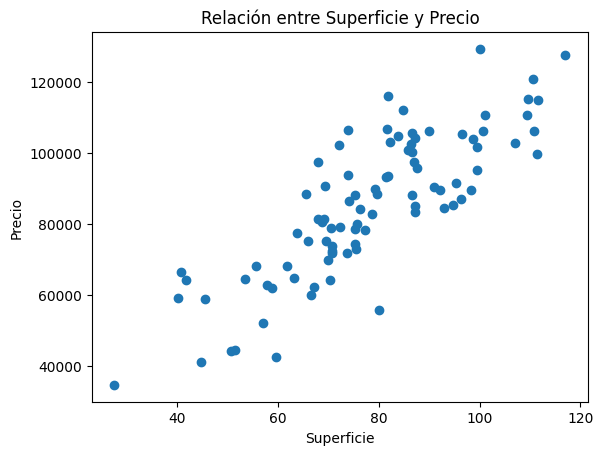

In [11]:
plt.figure()
plt.scatter(df_limpio['superficie'], df_limpio['precio'])
plt.title('Relación entre Superficie y Precio')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.show()

En un gráfico de dispersión no es tan fácil detectar visualemente outliers. Posiblemente el punto mas cercano al origen y el punto que cruza superficie 80 con precio aprox. 60000, pueden ser considerados como outliers.

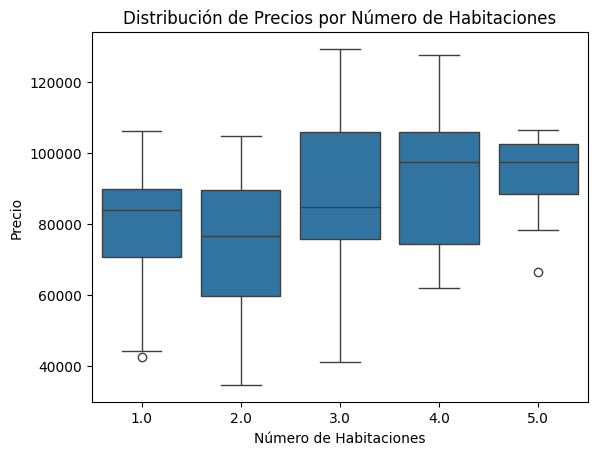

In [12]:
plt.figure()
sns.boxplot(x='habitaciones', y='precio', data=df_limpio)
plt.title('Distribución de Precios por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()

Visualmente se pueden detectar outliers en los datos para viviendas de 1 habitación y tambien para 5 habitaciones.

**4. Codificación de variables categóricas**

In [13]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df_limpio[['superficie', 'habitaciones', 'antiguedad', 'barrio']]
y = df_limpio['precio']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), ["barrio"])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
np.set_printoptions(suppress=True)

print(X)

[[  1.    0.    0.    0.    0.   89.9   1.   34. ]
 [  0.    1.    0.    0.    0.   77.2   5.   15. ]
 [  0.    0.    0.    0.    1.   93.    1.   40. ]
 [  0.    1.    0.    0.    0.  110.5   3.   35. ]
 [  0.    0.    1.    0.    0.   75.3   2.   32. ]
 [  0.    0.    1.    0.    0.   75.3   4.    3. ]
 [  0.    0.    0.    0.    1.  111.6   3.   32. ]
 [  1.    0.    0.    0.    0.   95.3   1.   13. ]
 [  0.    0.    1.    0.    0.   70.6   4.   20. ]
 [  0.    0.    0.    1.    0.   90.9   1.   47. ]
 [  0.    0.    1.    0.    0.   70.7   1.   19. ]
 [  0.    0.    1.    0.    0.   70.7   2.    7. ]
 [  1.    0.    0.    0.    0.   84.8   4.    6. ]
 [  0.    1.    0.    0.    0.   41.7   4.    2. ]
 [  0.    0.    1.    0.    0.   45.5   2.   16. ]
 [  0.    0.    0.    0.    1.   68.8   3.   32. ]
 [  0.    1.    0.    0.    0.   59.7   1.   47. ]
 [  0.    0.    0.    1.    0.   86.3   5.   11. ]
 [  1.    0.    0.    0.    0.   61.8   1.   21. ]
 [  0.    1.    0.    0.    0. 

**5. División del Dataset**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**6.1. Entrena un modelo de regresión lineal usando scikit-learn**

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**6.2. Utiliza como variables predictoras: superficie, habitaciones, antigüedad y los barrios codificados**

In [18]:
Y_pred = regressor.predict(X_test)

**6.3. Muestra los coeficientes del modelo**

In [19]:
b_0 = regressor.intercept_
b_1 = regressor.coef_[0]

print(f'El intercepto en y es: {b_0:.2f}')
print(f'La pendiente de la recta es: {b_1:.2f}')

El intercepto en y es: 1553.39
La pendiente de la recta es: -1544.85


**7.1. Calcula el Mean Squared Error (MSE) y el R² (coeficiente de determinación) sobre el conjunto de prueba**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f'El Error Cuadrático Medio es: {mse:.2f}')
print(f'El coeficiente de determinación R² es: {r2:.2f}')

El Error Cuadrático Medio es: 101526221.89
El coeficiente de determinación R² es: 0.78


**7.2. Comenta brevemente si el modelo tiene un buen desempeño**

Para tener una idea más clara de la magnitud del error en la misma unidad que el precio, se calcula la Raíz del Error Cuadrático Medio (RMSE), lo que da como resultado aproximadamente 10076. El RMSE es significativamente menor que la desviación estándar (aproximadamente 20285), lo que indica que modelo de regresión lineal ha logrado reducir la variabilidad del error de predicción en comparación con la variabilidad natural de los precios.

El R² de 0.78 indica que aproximadamente el 78% de la variabilidad en el precio de las viviendas puede ser explicada por las variables predictoras utilizadas en el modelo (superficie, habitaciones, antigüedad y barrio), lo cual es razonablemente bueno para un modelo de regresión, sugiriendo que las variables elegidas tienen una capacidad predictiva significativa sobre el precio.